In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict
import seaborn as sns

Reading data

In [2]:
df_train=pd.read_csv('dropout_train.csv')

In [3]:
df_train

,enrollment_id,username,course_id,n_videos,n_navigate,n_access,n_problem,n_page_close,n_discussion,n_wiki,n_events,n_events_lst_wk,n_access_lst_wk,n_access_lst2_wk,days_course_strt_access1,days_course_end_access_lst,unique_days_accessed,median_days_acs1_mod_rls,median_days_acslst_mod_rls,dropout
0,1,9Uee7oEuuMmgPx2IzPfFkWgkHZyPbWr0,DPnLzkJJqOOPRJfBxIHbQEERiYHu5ila,29,25,107,87,66,0,0,314,111,34,87,2.0,0.0,14,1.0,7.0,0
1,3,1qXC7Fjbwp66GPQc6pHLfEuO8WKozxG4,7GRhBDsirIGkRZBtSMEzNTyDr2JQm4xx,9,14,79,148,22,26,0,298,95,28,43,0.0,1.0,9,7.0,9.0,0
2,4,FIHlppZyoq8muPbdVxS44gfvceX9zvU7,DPnLzkJJqOOPRJfBxIHbQEERiYHu5ila,4,15,64,6,10,0,0,99,0,0,14,3.0,9.0,9,4.0,10.5,0
3,5,p1Mp7WkVfzUijX0peVQKSHbgd5pXyl4c,7GRhBDsirIGkRZBtSMEzNTyDr2JQm4xx,86,30,226,189,87,34,0,652,197,63,83,2.0,0.0,11,7.0,15.0,0
4,6,dpK33RH9yepUAnyoywRwBt1AJzxGlaja,AXUJZGmZ0xaYSWazu8RQ1G5c76ECT1Kd,2,5,12,2,2,0,0,23,23,12,12,27.0,1.0,2,203.0,203.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96418,200897,M2R4IY0V8T0jxOaASirvYDTUV5jV2Rus,9zpXzW9zCfU8KGBWkhlsGH8B8czISH4J,0,1,0,0,0,0,0,1,0,0,0,NaN,NaN,1,NaN,NaN,1
96419,200900,y6i20DJpIul6LihHwgZcWxbdAap5GcBP,9zpXzW9zCfU8KGBWkhlsGH8B8czISH4J,0,1,0,0,0,0,0,1,0,0,0,NaN,NaN,1,NaN,NaN,1
96420,200901,PPEydg4GXh52QanXuUYKbv8ENUSViBbd,9zpXzW9zCfU8KGBWkhlsGH8B8czISH4J,1,2,3,0,2,0,0,8,0,0,3,21.0,8.0,1,21.0,21.0,1
96421,200904,7k4xZXZirLFjbh80SpWNqJdTubgGglfv,9zpXzW9zCfU8KGBWkhlsGH8B8czISH4J,0,1,0,0,0,0,0,1,0,0,0,NaN,NaN,1,NaN,NaN,1


In [4]:
df_test=pd.read_csv('dropout_test.csv')

In [5]:
df_test

,enrollment_id,username,course_id,n_videos,n_navigate,n_access,n_problem,n_page_close,n_discussion,n_wiki,n_events,n_events_lst_wk,n_access_lst_wk,n_access_lst2_wk,days_course_strt_access1,days_course_end_access_lst,unique_days_accessed,median_days_acs1_mod_rls,median_days_acslst_mod_rls,dropout
0,9,J1oRHoSJOInehnrxVdh32dK7QnDuCJWo,DPnLzkJJqOOPRJfBxIHbQEERiYHu5ila,2,12,71,6,6,0,0,97,61,45,71,17.0,3.0,6,16.0,17.0,1
1,28,BoK7CAUaCFqnLgmWLxeOHg8YkXUSeCtc,TAYxxh39I2LZnftBpL0LfF2NxzrCKpkx,21,11,45,12,16,0,0,105,0,0,3,5.0,8.0,6,7.0,14.0,1
2,32,Jm4nQ05ndX10jbofbWx6S0r9VXrqia6S,AXUJZGmZ0xaYSWazu8RQ1G5c76ECT1Kd,1,9,27,13,16,7,0,73,58,20,27,18.0,0.0,5,11.5,18.0,0
3,46,hnewTKKnZRwEeXEZu9RmHHva1PDybMo2,KHPw0gmg1Ad3V07TqRpyBzA8mRjj7mkt,0,1,0,0,0,0,0,1,0,0,0,NaN,NaN,1,NaN,NaN,1
4,48,1ELMItXjpijnCZU4WKxvrVri8AjkR2gf,AXUJZGmZ0xaYSWazu8RQ1G5c76ECT1Kd,27,15,70,18,41,0,1,172,98,37,37,13.0,1.0,5,166.0,172.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24114,200860,9nSUuUWu5HNDbCrFPMSa4E0asUuM7lBR,mTmmr5zd8l4wXhwiULwjSmSbi9ktcFmV,0,1,0,0,0,0,0,1,1,0,0,NaN,NaN,1,NaN,NaN,1
24115,200861,FVlbYQVV5WHtANfNywM7MqQTm6x5MZoy,mTmmr5zd8l4wXhwiULwjSmSbi9ktcFmV,0,2,0,0,0,0,0,2,2,0,0,NaN,NaN,1,NaN,NaN,1
24116,200880,BYvr8HwjIxIO9D11YRvidM8mXBtvCkAI,mTmmr5zd8l4wXhwiULwjSmSbi9ktcFmV,0,2,2,0,0,0,1,5,5,2,2,28.0,1.0,1,NaN,NaN,0
24117,200895,DZjg6cB77aqoen6Ol57HJ5qtVHbTRPJ6,9zpXzW9zCfU8KGBWkhlsGH8B8czISH4J,0,1,0,0,0,0,0,1,0,0,0,NaN,NaN,1,NaN,NaN,1


### a) Analyze data

In [6]:
df_train.corr()

C:\Users\bhang\AppData\Local\Temp\ipykernel_4772\299540020.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_train.corr()


,n_videos,n_navigate,n_access,n_problem,n_page_close,n_discussion,n_wiki,n_events,n_events_lst_wk,n_access_lst_wk,n_access_lst2_wk,days_course_strt_access1,days_course_end_access_lst,unique_days_accessed,median_days_acs1_mod_rls,median_days_acslst_mod_rls,dropout
n_videos,1.000000,0.605246,0.799883,0.614692,0.819636,0.291452,0.196296,0.827623,0.646041,0.628296,0.693042,-0.171350,-0.363429,0.667484,-0.017267,-0.003977,-0.419717
n_navigate,0.605246,1.000000,0.718027,0.488849,0.709246,0.499179,0.393316,0.803644,0.565011,0.521418,0.592772,-0.219736,-0.381726,0.779440,-0.077001,-0.061041,-0.458008
n_access,0.799883,0.718027,1.000000,0.672581,0.789888,0.357177,0.236856,0.923158,0.669930,0.701827,0.857468,-0.200954,-0.399386,0.754634,-0.056144,-0.039738,-0.463098
n_problem,0.614692,0.488849,0.672581,1.000000,0.523621,0.244517,0.142953,0.765030,0.587220,0.510619,0.575371,-0.147126,-0.277761,0.528257,-0.038411,-0.028596,-0.332043
n_page_close,0.819636,0.709246,0.789888,0.523621,1.000000,0.329097,0.244055,0.829678,0.636740,0.616018,0.680657,-0.206898,-0.421527,0.760248,-0.059172,-0.042475,-0.488868
n_discussion,0.291452,0.499179,0.357177,0.244517,0.329097,1.000000,0.402739,0.599224,0.393654,0.237985,0.275311,-0.094804,-0.132415,0.369239,-0.040908,-0.035569,-0.175558
n_wiki,0.196296,0.393316,0.236856,0.142953,0.244055,0.402739,1.000000,0.355021,0.219965,0.160916,0.193903,-0.070961,-0.114692,0.261787,-0.026053,-0.022321,-0.152814
n_events,0.827623,0.803644,0.923158,0.765030,0.829678,0.599224,0.355021,1.000000,0.729948,0.671745,0.781968,-0.211849,-0.400200,0.783341,-0.061290,-0.045507,-0.471502
n_events_lst_wk,0.646041,0.565011,0.669930,0.587220,0.636740,0.393654,0.219965,0.729948,1.000000,0.936158,0.760249,0.035229,-0.451590,0.556130,-0.016747,-0.006617,-0.436475
n_access_lst_wk,0.628296,0.521418,0.701827,0.510619,0.616018,0.237985,0.160916,0.671745,0.936158,1.000000,0.804827,0.036949,-0.457931,0.549625,-0.012621,-0.001695,-0.437363


In [7]:
df_train.dtypes

enrollment_id                  object
username                       object
course_id                      object
n_videos                        int64
n_navigate                      int64
n_access                        int64
n_problem                       int64
n_page_close                    int64
n_discussion                    int64
n_wiki                          int64
n_events                        int64
n_events_lst_wk                 int64
n_access_lst_wk                 int64
n_access_lst2_wk                int64
days_course_strt_access1      float64
days_course_end_access_lst    float64
unique_days_accessed            int64
median_days_acs1_mod_rls      float64
median_days_acslst_mod_rls    float64
dropout                         int64
dtype: object

In [8]:
df_train.describe()

,n_videos,n_navigate,n_access,n_problem,n_page_close,n_discussion,n_wiki,n_events,n_events_lst_wk,n_access_lst_wk,n_access_lst2_wk,days_course_strt_access1,days_course_end_access_lst,unique_days_accessed,median_days_acs1_mod_rls,median_days_acslst_mod_rls,dropout
count,96423.000000,96423.000000,96423.000000,96423.000000,96423.000000,96423.000000,96423.000000,96423.000000,96423.000000,96423.000000,96423.000000,73118.000000,73118.000000,96423.000000,58422.000000,58422.000000,96423.000000
mean,6.641610,8.401678,25.845898,10.677100,10.272155,5.412941,0.753907,68.005289,16.090072,6.363005,12.303361,8.821795,13.415397,2.671437,23.667976,25.274811,0.792425
std,14.739324,13.003143,54.421452,34.805827,20.678729,36.838298,4.006820,140.169147,49.475405,19.487712,33.462445,8.447732,9.683811,3.109517,59.918248,59.625010,0.405573
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-185.000000,-185.000000,0.000000
25%,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,2.000000,4.000000,1.000000,3.500000,5.500000,1.000000
50%,1.000000,4.000000,6.000000,0.000000,2.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,6.000000,13.000000,1.000000,9.500000,12.000000,1.000000
75%,6.000000,10.000000,26.000000,6.000000,10.000000,2.000000,1.000000,68.000000,6.000000,2.000000,9.000000,15.000000,22.000000,3.000000,21.000000,22.000000,1.000000
max,399.000000,649.000000,3659.000000,1046.000000,400.000000,4360.000000,554.000000,5289.000000,1554.000000,655.000000,3659.000000,29.000000,29.000000,30.000000,379.000000,379.000000,1.000000


In [9]:
df_train.isnull()

,enrollment_id,username,course_id,n_videos,n_navigate,n_access,n_problem,n_page_close,n_discussion,n_wiki,n_events,n_events_lst_wk,n_access_lst_wk,n_access_lst2_wk,days_course_strt_access1,days_course_end_access_lst,unique_days_accessed,median_days_acs1_mod_rls,median_days_acslst_mod_rls,dropout
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96418,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,True,True,False
96419,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,True,True,False
96420,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
96421,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,True,True,False


### b) Handle data

In [10]:
df_train.isnull().sum()

enrollment_id                     1
username                          0
course_id                         0
n_videos                          0
n_navigate                        0
n_access                          0
n_problem                         0
n_page_close                      0
n_discussion                      0
n_wiki                            0
n_events                          0
n_events_lst_wk                   0
n_access_lst_wk                   0
n_access_lst2_wk                  0
days_course_strt_access1      23305
days_course_end_access_lst    23305
unique_days_accessed              0
median_days_acs1_mod_rls      38001
median_days_acslst_mod_rls    38001
dropout                           0
dtype: int64

In [11]:
df_train['days_course_strt_access1'].fillna(value = df_train['days_course_strt_access1'].mean(), inplace = True)

In [12]:
df_train['days_course_end_access_lst'].fillna(value = df_train['days_course_end_access_lst'].mean(), inplace = True)
df_train['median_days_acs1_mod_rls'].fillna(value = df_train['median_days_acs1_mod_rls'].mean(), inplace = True)
df_train['median_days_acslst_mod_rls'].fillna(value = df_train['median_days_acslst_mod_rls'].mean(), inplace = True)

In [13]:
df_train.dropna(how = 'any', inplace = True)

In [14]:
df_train.isnull().sum()

enrollment_id                 0
username                      0
course_id                     0
n_videos                      0
n_navigate                    0
n_access                      0
n_problem                     0
n_page_close                  0
n_discussion                  0
n_wiki                        0
n_events                      0
n_events_lst_wk               0
n_access_lst_wk               0
n_access_lst2_wk              0
days_course_strt_access1      0
days_course_end_access_lst    0
unique_days_accessed          0
median_days_acs1_mod_rls      0
median_days_acslst_mod_rls    0
dropout                       0
dtype: int64

In [15]:
df_test.isnull().sum()

enrollment_id                    0
username                         0
course_id                        0
n_videos                         0
n_navigate                       0
n_access                         0
n_problem                        0
n_page_close                     0
n_discussion                     0
n_wiki                           0
n_events                         0
n_events_lst_wk                  0
n_access_lst_wk                  0
n_access_lst2_wk                 0
days_course_strt_access1      5867
days_course_end_access_lst    5867
unique_days_accessed             0
median_days_acs1_mod_rls      9685
median_days_acslst_mod_rls    9685
dropout                          0
dtype: int64

In [16]:
df_test['days_course_strt_access1'].fillna(value = df_test['days_course_strt_access1'].mean(), inplace = True)
df_test['days_course_end_access_lst'].fillna(value = df_test['days_course_end_access_lst'].mean(), inplace = True)
df_test['median_days_acs1_mod_rls'].fillna(value = df_test['median_days_acs1_mod_rls'].mean(), inplace = True)
df_test['median_days_acslst_mod_rls'].fillna(value = df_test['median_days_acslst_mod_rls'].mean(), inplace = True)

In [17]:
df_train.isnull().sum()

enrollment_id                 0
username                      0
course_id                     0
n_videos                      0
n_navigate                    0
n_access                      0
n_problem                     0
n_page_close                  0
n_discussion                  0
n_wiki                        0
n_events                      0
n_events_lst_wk               0
n_access_lst_wk               0
n_access_lst2_wk              0
days_course_strt_access1      0
days_course_end_access_lst    0
unique_days_accessed          0
median_days_acs1_mod_rls      0
median_days_acslst_mod_rls    0
dropout                       0
dtype: int64

C:\Users\bhang\AppData\Local\Temp\ipykernel_4772\437187057.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df_train.corr()


<AxesSubplot: >

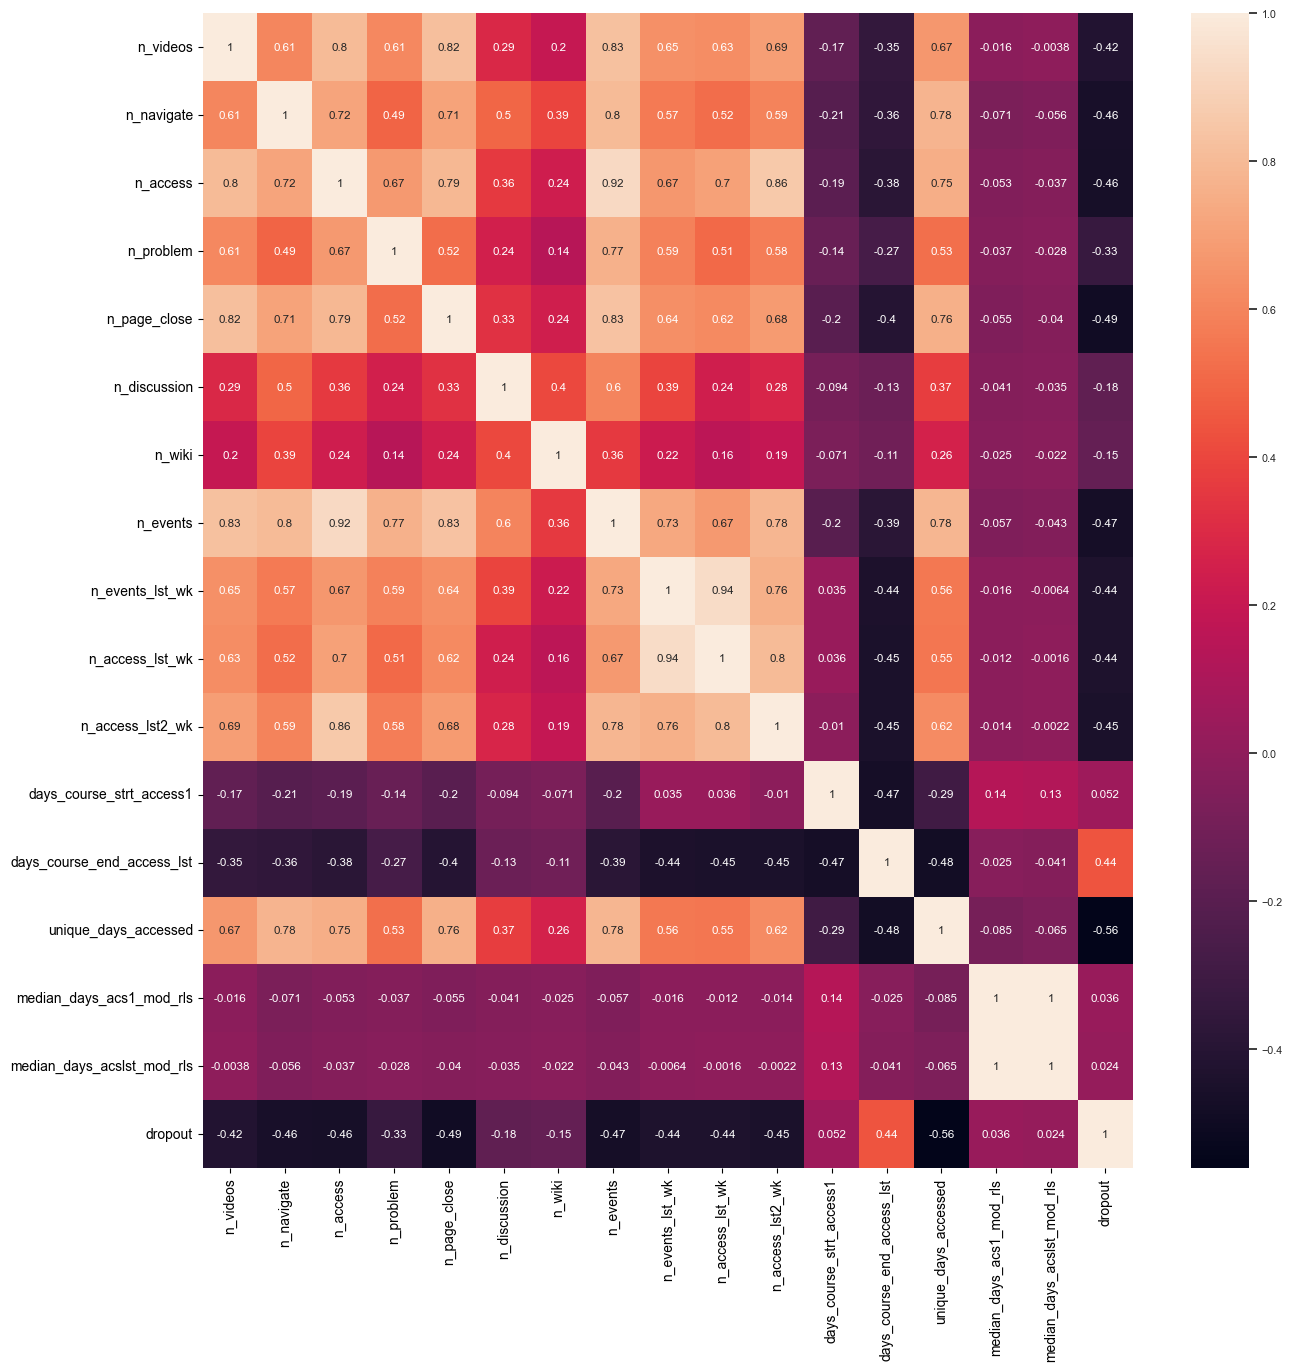

In [65]:
correlations = df_train.corr()
fig ,ax = plt.subplots(figsize=(15,15))
sns.set_theme(style = 'white', font_scale=0.7)
sns.heatmap(correlations, annot = True)

In [66]:
def correlation(dataset, threshold):
    col_corr=set()
    corr_matrix = dataset.corr()
    for i in range (len(corr_matrix.columns)):
        for j in range (i):
            if (corr_matrix.iloc[i,j])>threshold:
                colname= corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [67]:
corr_features = correlation(df_train,0.5)
len(set(corr_features))

C:\Users\bhang\AppData\Local\Temp\ipykernel_4772\1478448630.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = dataset.corr()


10

### c) Building models

In [18]:
X_train  = df_train.drop(['enrollment_id', 'username', 'course_id', 'dropout'], axis = 1)

In [19]:
y_train = df_train['dropout']

In [20]:
X_test = df_test.drop(['enrollment_id', 'username', 'course_id', 'dropout'], axis = 1)

In [21]:
y_test = df_test['dropout']

### Random Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
rfa = RandomForestClassifier(n_estimators = 300, criterion = 'entropy')

In [24]:
rfa.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=300)

In [25]:
from sklearn.metrics import accuracy_score

In [26]:
result = rfa.predict(X_test)
accuracy_score(y_test, result)

0.8752021228077449

In [51]:
joblib.dump(gbm,'gbm.joblib')

['gbm.joblib']

In [54]:
RF = joblib.load('rf.joblib')

In [55]:
predic_rf = RF.predict(X_test)
accuracy_score(predic_rf,y_test)

0.8752021228077449

In [56]:
GB = joblib.load('gbm.joblib')

In [57]:
predic_gb = GB.predict(X_test)
accuracy_score(predic_gb,y_test)

0.8789750818856503

In [58]:
XGB = joblib.load('xgb.joblib')

In [59]:
predic_xgb = XGB.predict(X_test)
accuracy_score(predic_xgb,y_test)

0.8722998465939715